
# EXPERIMENT 8 : SVM Kernel Trick Demonstration on the "moons" dataset

This notebook follows the five tasks from the experiment brief:
1. Data Loading and Preprocessing
2. Model 1 — Linear SVM
3. Model 2 & 3 — RBF and Polynomial SVMs (Kernel Trick)
4. Hyperparameter Tuning with GridSearchCV
5. Final Evaluation and Visualization (confusion matrix + decision boundaries)

Requirements: `numpy`, `pandas`, `scikit-learn`, `matplotlib`.

Run each cell sequentially. The final cell produces a 1×3 plot of decision boundaries.


In [1]:

# Setup: imports and common settings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import itertools

# make plots display inline (for Jupyter)
%matplotlib inline


In [2]:

# Task 1: Data Loading & Preprocessing
X, y = make_moons(n_samples=500, noise=0.25, random_state=42)
print(f"Generated data shape: X={X.shape}, y={y.shape}")

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
print(f"Train shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Val shape:   X_val={X_val.shape}, y_val={y_val.shape}\n")

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
print("StandardScaler fitted on training data and applied to both sets.\n")


Generated data shape: X=(500, 2), y=(500,)
Train shape: X_train=(350, 2), y_train=(350,)
Val shape:   X_val=(150, 2), y_val=(150,)

StandardScaler fitted on training data and applied to both sets.



In [6]:

# Task 2: Linear SVM (expected to underfit this non-linear data)
linear_model = SVC(kernel='linear', C=1.0, random_state=42)
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_val_scaled)

print("Linear SVM - Validation Classification Report:")
print(classification_report(y_val, y_pred_linear))
acc_linear = accuracy_score(y_val, y_pred_linear)
print(f"Linear SVM - Validation Accuracy: {acc_linear:.4f}\n")


Linear SVM - Validation Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        75
           1       0.86      0.81      0.84        75

    accuracy                           0.84       150
   macro avg       0.84      0.84      0.84       150
weighted avg       0.84      0.84      0.84       150

Linear SVM - Validation Accuracy: 0.8400



In [7]:

# Task 3: Kernel SVMs - RBF and Polynomial
rbf_model = SVC(kernel='rbf', random_state=42)
rbf_model.fit(X_train_scaled, y_train)
y_pred_rbf = rbf_model.predict(X_val_scaled)

print("Default RBF SVM - Validation Classification Report:")
print(classification_report(y_val, y_pred_rbf))
acc_rbf = accuracy_score(y_val, y_pred_rbf)
print(f"Default RBF SVM - Validation Accuracy: {acc_rbf:.4f}\n")

poly_model = SVC(kernel='poly', degree=3, random_state=42)
poly_model.fit(X_train_scaled, y_train)
y_pred_poly = poly_model.predict(X_val_scaled)

print("Polynomial (degree=3) SVM - Validation Classification Report:")
print(classification_report(y_val, y_pred_poly))
acc_poly = accuracy_score(y_val, y_pred_poly)
print(f"Polynomial SVM - Validation Accuracy: {acc_poly:.4f}\n")

# Comparison table
comparison_df = pd.DataFrame({
    'Model': ['Linear SVM', 'Default RBF SVM', 'Polynomial (deg=3) SVM'],
    'Validation Accuracy': [acc_linear, acc_rbf, acc_poly]
})
comparison_df


Default RBF SVM - Validation Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        75
           1       0.97      0.92      0.95        75

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150

Default RBF SVM - Validation Accuracy: 0.9467

Polynomial (degree=3) SVM - Validation Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        75
           1       0.83      0.85      0.84        75

    accuracy                           0.84       150
   macro avg       0.84      0.84      0.84       150
weighted avg       0.84      0.84      0.84       150

Polynomial SVM - Validation Accuracy: 0.8400



,Model,Validation Accuracy
0,Linear SVM,0.840000
1,Default RBF SVM,0.946667
2,Polynomial (deg=3) SVM,0.840000


In [8]:

# Task 4: GridSearchCV for RBF SVM hyperparameters
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10, 100],
    'kernel': ['rbf']
}

grid = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    refit=True,
    verbose=1
)
grid.fit(X_train_scaled, y_train)

print("Best parameters from GridSearchCV:", grid.best_params_)
print(f"Best cross-validation accuracy (train set): {grid.best_score_:.4f}\n")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters from GridSearchCV: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best cross-validation accuracy (train set): 0.9543



Tuned RBF SVM - Final Validation Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        75
           1       0.96      0.95      0.95        75

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150

Tuned RBF SVM - Validation Accuracy: 0.9533

Confusion Matrix (Tuned RBF SVM on validation set):
[[72  3]
 [ 4 71]]


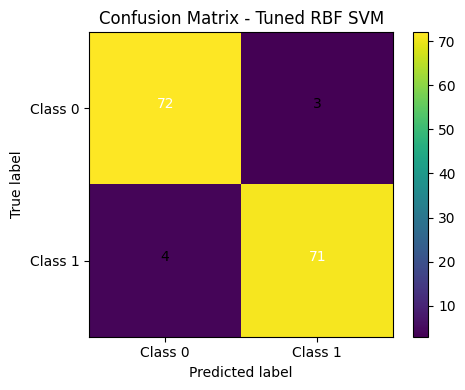

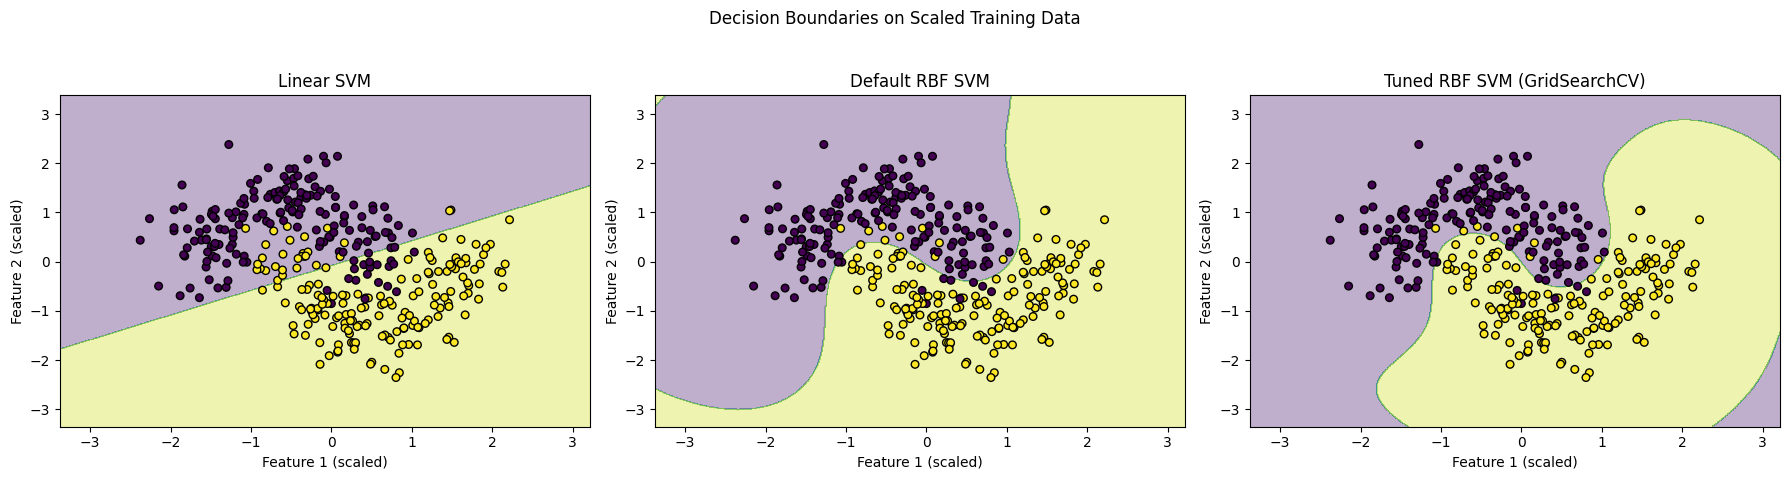

In [9]:

# Task 5: Final Evaluation and Visualization
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_val_scaled)

print("Tuned RBF SVM - Final Validation Classification Report:")
print(classification_report(y_val, y_pred_best))
acc_best = accuracy_score(y_val, y_pred_best)
print(f"Tuned RBF SVM - Validation Accuracy: {acc_best:.4f}\n")

# Confusion matrix plot
cm = confusion_matrix(y_val, y_pred_best)
print("Confusion Matrix (Tuned RBF SVM on validation set):")
print(cm)

plt.figure(figsize=(5,4))
plt.imshow(cm, interpolation='nearest')
plt.title('Confusion Matrix - Tuned RBF SVM')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Class 0', 'Class 1'])
plt.yticks(tick_marks, ['Class 0', 'Class 1'])

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Decision boundary plotting helper
def plot_decision_boundary(ax, model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    y_min, y_max = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 500),
        np.linspace(y_min, y_max, 500)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.35)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=30)
    ax.set_title(title)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

# 1x3 subplot for decision boundaries
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
plot_decision_boundary(axes[0], linear_model, X_train_scaled, y_train, 'Linear SVM')
plot_decision_boundary(axes[1], rbf_model, X_train_scaled, y_train, 'Default RBF SVM')
plot_decision_boundary(axes[2], best_model, X_train_scaled, y_train, 'Tuned RBF SVM (GridSearchCV)')

for ax in axes:
    ax.set_xlabel('Feature 1 (scaled)')
    ax.set_ylabel('Feature 2 (scaled)')

plt.suptitle('Decision Boundaries on Scaled Training Data')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
